# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [306]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import requests
import matplotlib.pyplot as plt
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np

In [307]:
!which chromedriver

/usr/local/bin/chromedriver


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [308]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
res = requests.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [309]:
# Create a Beautiful Soup Object
html_soup = soup(res.text, 'html.parser')
table = html_soup.find('table')

In [310]:
# Extract all rows of data
mars_weather = pd.read_html(str(table))[0]
mars_weather

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [227]:
# Create an empty list
temp_data = []
# Loop through the scraped data to create a list of rows
for i in range(len(mars_weather)):
    temp = mars_weather.iloc[i]
    temp_data.append(temp)
temp_data

[id                           2
 terrestrial_date    2012-08-16
 sol                         10
 ls                         155
 month                        6
 min_temp                 -75.0
 pressure                 739.0
 Name: 0, dtype: object,
 id                          13
 terrestrial_date    2012-08-17
 sol                         11
 ls                         156
 month                        6
 min_temp                 -76.0
 pressure                 740.0
 Name: 1, dtype: object,
 id                          24
 terrestrial_date    2012-08-18
 sol                         12
 ls                         156
 month                        6
 min_temp                 -76.0
 pressure                 741.0
 Name: 2, dtype: object,
 id                          35
 terrestrial_date    2012-08-19
 sol                         13
 ls                         157
 month                        6
 min_temp                 -74.0
 pressure                 732.0
 Name: 3, dtype: object,
 id 

In [257]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
temp_df = pd.DataFrame(temp_data)

In [258]:
# Confirm DataFrame was created successfully
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [259]:
# Examine data type of each column
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 116.7+ KB


In [260]:
# Change data types for data analysis
temp_df['terrestrial_date'] = pd.to_datetime(temp_df['terrestrial_date'])

In [261]:
# Confirm type changes were successful by examining data types again
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 116.7 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [262]:
# 1. How many months are there on Mars?
months = np.unique(temp_df['month'])
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [263]:
# 2. How many Martian days' worth of data are there?
# Sol in the DataFrame is in ascending order
sol_range = temp_df['sol'].max() - temp_df['sol'].min()
sol_range

1967

In [264]:
# 3. What is the average low temperature by month?
mintemp_df = temp_df.groupby('month', as_index=False).mean().sort_values('min_temp')
mintemp_df

,month,id,sol,ls,min_temp,pressure
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
1,2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
11,12,931.602410,990.951807,344.692771,-74.451807,842.156627
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
10,11,874.246377,947.224638,314.536232,-71.985507,857.014493
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


Text(0.5, 1.0, 'The Average Low Temperature by Martian Month')

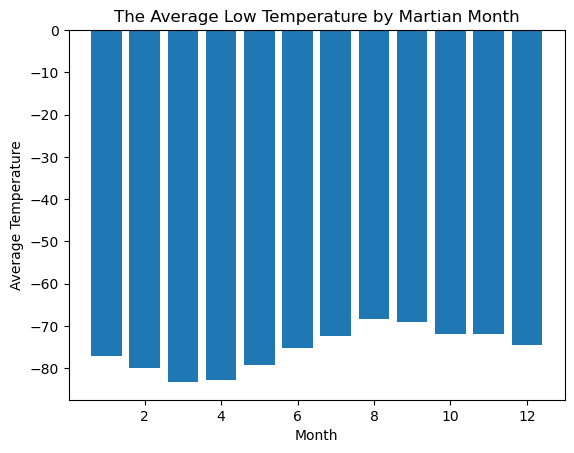

In [265]:
# Plot the average temperature by month
plt.bar('month','min_temp', data = mintemp_df)
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.title("The Average Low Temperature by Martian Month")

In [266]:
# Identify the coldest and hottest months in Curiosity's location on average

mintemp_df.loc[(mintemp_df['min_temp'] == mintemp_df['min_temp'].min()) | (mintemp_df['min_temp'] == mintemp_df['min_temp'].max())]

,month,id,sol,ls,min_temp,pressure
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787


In [267]:
# 4. Average pressure by Martian month
avg_pressure_df = temp_df.groupby('month', as_index=False).mean().sort_values('pressure')
avg_pressure_df

,month,id,sol,ls,min_temp,pressure
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
11,12,931.602410,990.951807,344.692771,-74.451807,842.156627
10,11,874.246377,947.224638,314.536232,-71.985507,857.014493
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


Text(0.5, 1.0, 'The Average Pressure by Martian month')

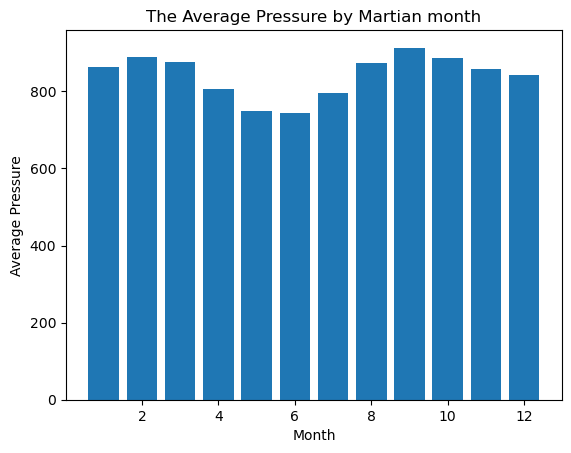

In [268]:
# Plot the average pressure by month
plt.bar('month','pressure', data = avg_pressure_df)
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.title("The Average Pressure by Martian month")

In [269]:
# Identify the lowest and highest months in Curiosity's location on average
mintemp_df.loc[(mintemp_df['pressure'] == mintemp_df['pressure'].min()) | (mintemp_df['pressure'] == mintemp_df['pressure'].max())]

,month,id,sol,ls,min_temp,pressure
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
8,9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [305]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# Visually estimate the result by plotting the daily minimum temperature.
# One martian day = 24.66 hours 
earth_day_martian = 0
for m in months:
    sol_duration = temp_df.loc[temp_df['month'] == m, 'sol'].max() - temp_df.loc[temp_df['month'] == m, 'sol'].min()
    earth_day_martian += (sol_duration / 24.66)

print("Terrestrial (earth) days in a Martian year:",round(earth_day_martian, 2))

Terrestrial (earth) days in a Martian year: 675.71


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [199]:
# Write the data to a CSV
temp_df.to_csv("mars_temp.csv", encoding='utf8', index=False)

In [ ]:
browser.quit()